In [51]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Download stock data from Yahoo Finance
ticker = '^IXIC'
start_date = '2022-01-01'
end_date = '2023-01-01'
stock_data =  yf.download(ticker, start=start_date, end=end_date)

# Extract the closing prices from the stock data
stock_prices = stock_data['Close'].values

[*********************100%***********************]  1 of 1 completed


In [52]:
# Define parameters
T = len(stock_data) # Number of trading days
S0 = stock_data['Close'].iloc[0] # Initial stock price
mu = np.mean(stock_data['Close'].pct_change()) # Drift parameter
sigma = np.std(stock_data['Close'].pct_change()) # Volatility parameter
dt = 1 / 252 # Time step
n_sim = 1000 # Number of simulations


In [53]:
# Generate Halton quasi-random numbers
def halton(p, n):
    b = np.zeros((int(np.ceil(np.log(n + 1) / np.log(p))),))
    u = np.zeros((n,))
    for j in range(n):
        i = 0
        b[0] += 1
        while b[i] > p - 1 + np.finfo(float).eps:
            b[i] = 0  # in base p
            i += 1
            b[i] += 1
        for k in range(len(b)):
            u[j] += b[k] * p ** (-k - 1)
    return u

# quasi_random_numbers = halton(2,n_sim*T)

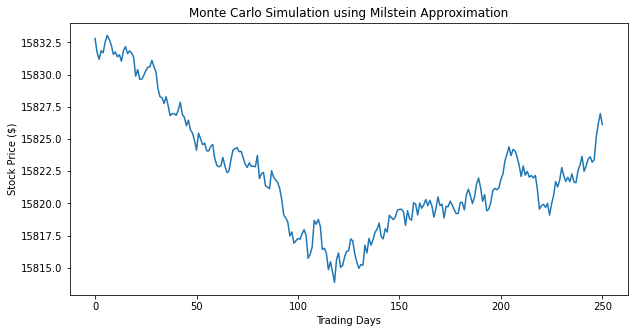

In [54]:

# Perform Monte Carlo Simulation using Milstein Approximation
S = np.zeros((n_sim, T))
S[:, 0] = S0

for i in range(n_sim):
    for j in range(1, T):
        dW = np.random.normal(0, np.sqrt(dt))
        #dW = np.sqrt(dt)*quasi_random_numbers[i*T+j]
        S[i, j] = S[i, j-1] + S[i, j-1]*mu*dt + S[i, j-1]*sigma*dW + \
            0.5*S[i, j-1]*sigma*(dW**2-dt)
        
MCM_mean = np.mean(S, axis=0)
# Plot Monte Carlo simulation results
plt.figure(figsize=(10, 5))
plt.plot(MCM_mean)
plt.xlabel('Trading Days')
plt.ylabel('Stock Price ($)')
plt.title('Monte Carlo Simulation using Milstein Approximation')
plt.show()


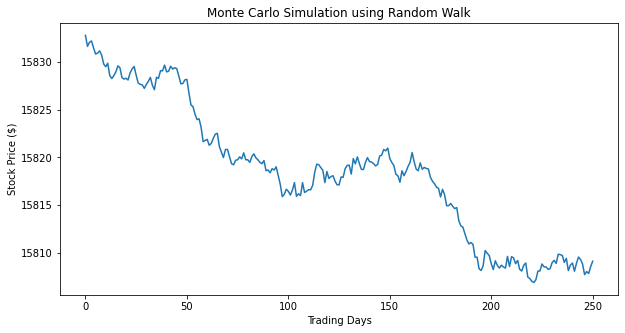

In [55]:

# Perform Monte Carlo simulation using random walk
S = np.zeros((n_sim, T))
S[:, 0] = S0

for i in range(n_sim):
    for j in range(1, T):
        dW = np.random.normal(0, np.sqrt(dt))
        #dW = np.sqrt(dt)*quasi_random_numbers[i*T+j]
        S[i, j] = S[i, j-1] + S[i, j-1]*(mu*dt + sigma*dW)

MCRW_mean = np.mean(S, axis=0)

# Plot the mean of the Monte Carlo simulation results
plt.figure(figsize=(10, 5))
plt.plot(MCRW_mean)
plt.xlabel('Trading Days')
plt.ylabel('Stock Price ($)')
plt.title('Monte Carlo Simulation using Random Walk')
plt.show()


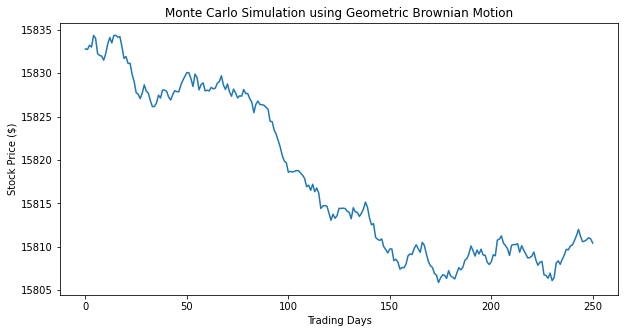

In [56]:

# Perform Monte Carlo simulation using Geometric Brownian Motion
S = np.zeros((n_sim, T))
S[:, 0] = S0

for i in range(n_sim):
    for j in range(1, T):
        dW = np.random.normal(0, np.sqrt(dt))
        #dW = np.sqrt(dt)*quasi_random_numbers[i*T+j]
        S[i, j] = S[i, j-1]*np.exp((mu-0.5*sigma**2)*dt + sigma*dW)

MCGBM_mean = np.mean(S, axis=0)

# Plot the mean of the Monte Carlo simulation results
plt.figure(figsize=(10, 5))
plt.plot(MCGBM_mean)
plt.xlabel('Trading Days')
plt.ylabel('Stock Price ($)')
plt.title('Monte Carlo Simulation using Geometric Brownian Motion')
plt.show()


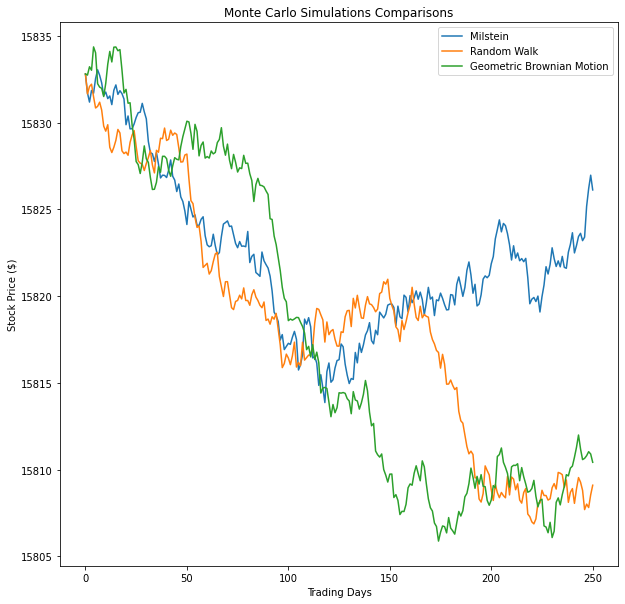

In [62]:
plt.figure(figsize=(10, 10))
#plt.plot(stock_prices, label='Original')
plt.plot(MCM_mean, label='Milstein')
plt.plot(MCRW_mean, label='Random Walk')
plt.plot(MCGBM_mean, label='Geometric Brownian Motion')
plt.xlabel('Trading Days')
plt.ylabel('Stock Price ($)')
plt.title('Monte Carlo Simulations Comparisons')
plt.legend()
plt.show()

In [58]:
# Calculate Mean Squared Error (MSE):
MSE_MCM = np.mean((MCM_mean - stock_prices)**2)
MSE_MCRW = np.mean((MCRW_mean - stock_prices)**2)
MSE_MCGBM = np.mean((MCGBM_mean - stock_prices)**2)

# Calculate Root Mean Squared Error (RMSE):
RMSE_MCM = np.sqrt(MSE_MCM)
RMSE_MCRW = np.sqrt(MSE_MCRW)
RMSE_MCGBM = np.sqrt(MSE_MCGBM)

# Calculate Mean Absolute Error (MAE):
MAE_MCM = np.mean(np.abs(MCM_mean - stock_prices))
MAE_MCRW = np.mean(np.abs(MCRW_mean - stock_prices))
MAE_MCGBM = np.mean(np.abs(MCGBM_mean - stock_prices))

print("MSE - MCM: {:.4f}, MCRW: {:.4f}, MCGBM: {:.4f}".format(MSE_MCM, MSE_MCRW, MSE_MCGBM))
print("RMSE - MCM: {:.4f}, MCRW: {:.4f}, MCGBM: {:.4f}".format(RMSE_MCM, RMSE_MCRW, RMSE_MCGBM))
print("MAE - MCM: {:.4f}, MCRW: {:.4f}, MCGBM: {:.4f}".format(MAE_MCM, MAE_MCRW, MAE_MCGBM))


MSE - MCM: 14649575.9705, MCRW: 14613399.4045, MCGBM: 14605860.8573
RMSE - MCM: 3827.4764, MCRW: 3822.7476, MCGBM: 3821.7615
MAE - MCM: 3590.9285, MCRW: 3587.0398, MCGBM: 3586.4849


In [75]:
1 - 0.1243

0.8757